Haridwar classified as: North


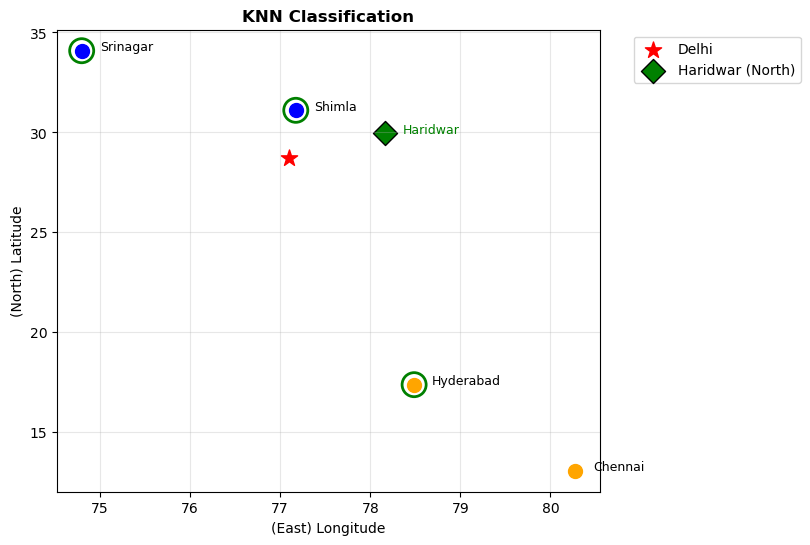

In [12]:
#KNN Classification Taking Cities Of North And South And Plot Them using Latitude and Longitude 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

cities = [
    {'name': 'Delhi', 'lat': 28.7041, 'lon': 77.1025, 'label': None},  # Reference
    {'name': 'Shimla', 'lat': 31.1048, 'lon': 77.1734, 'label': 'North'},
    {'name': 'Srinagar', 'lat': 34.0837, 'lon': 74.7973, 'label': 'North'},
    {'name': 'Hyderabad', 'lat': 17.3850, 'lon': 78.4867, 'label': 'South'},
    {'name': 'Chennai', 'lat': 13.0827, 'lon': 80.2707, 'label': 'South'},
]

# --- Step 2: Euclidean Distance Function ---
def euclidean(lat1, lon1, lat2, lon2):
    return np.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

# --- Step 3: Compute Distance from Delhi ---
delhi = cities[0]
for city in cities[1:]:
    city['distance'] = euclidean(delhi['lat'], delhi['lon'], city['lat'], city['lon'])

# --- Step 4: Prepare Data ---
X = np.array([[c['lat'], c['lon']] for c in cities[1:]])
y = np.array([c['label'] for c in cities[1:]])

# --- Step 5: Simple KNN Classifier ---
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            # Compute Euclidean distances
            distances = np.linalg.norm(self.X - test_point, axis=1)
            # Get nearest k neighbors
            nearest_idx = distances.argsort()[:self.k]
            nearest_labels = self.y[nearest_idx]
            # Majority vote
            most_common = Counter(nearest_labels).most_common(1)[0][0]
            predictions.append((most_common, nearest_idx))
        return predictions

# --- Step 6: Train the Model ---
knn = KNNClassifier(k=3)
knn.fit(X, y)

# --- Step 7: Test with Haridwar ---
haridwar = {'name': 'Haridwar', 'lat': 29.9457, 'lon': 78.1642}
pred_label, nearest_idx = knn.predict([[haridwar['lat'], haridwar['lon']]])[0]

print(f"Haridwar classified as: {pred_label}")

# --- Step 8: Visualization ---
plt.figure(figsize=(7,6))
colors = {'North': 'blue', 'South': 'orange'}

# Plot all training cities
for i, c in enumerate(cities[1:]):
    plt.scatter(c['lon'], c['lat'], color=colors[c['label']], s=100)
    plt.text(c['lon']+0.2, c['lat'], c['name'], fontsize=9)

# Plot Delhi (Reference)
plt.scatter(delhi['lon'], delhi['lat'], color='red', s=150, marker='*', label='Delhi')

# Plot Haridwar (Test)
plt.scatter(haridwar['lon'], haridwar['lat'], color='green', s=150, marker='D', edgecolor='black',
            label=f"Haridwar ({pred_label})")
plt.text(haridwar['lon']+0.2, haridwar['lat'], "Haridwar", fontsize=9, color='green')

# Highlight nearest 3 neighbors
for idx in nearest_idx:
    plt.scatter(X[idx][1], X[idx][0], s=300, facecolors='none', edgecolors='green', linewidths=2)

# Labels and style
plt.title("KNN Classification", weight='bold')
plt.xlabel("(East) Longitude")
plt.ylabel("(North) Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()